### Exercise 2.10: Semi-empirical mass formula

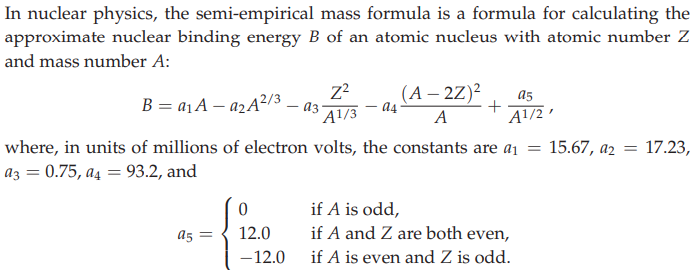

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb as comb

Write a program that takes as its input the values of mass number A and atomic number Z, and prints out the binding energy B for the corresponding atom. Use your program to find the binding energy of an atom with A = 58 and Z = 28. You should get around 490 MeV.

In [2]:
def binding_energy(A, Z):
    a1, a2, a3, a4 = 15.67, 17.23, 0.75, 93.2
    if A%2 == 1:
        a5 = 0
    if A%2 == 0 and Z%2 == 0:
        a5 = 12.0
    if A%2 == 0 and Z%2 == 1:
        a5 = -12.0
    B = a1*A - a2*A**(2/3) - a3*(Z**2)/(np.cbrt(A)) - a4*((A-2*Z)**2)/A + a5/(np.sqrt(A))
    return B

In [3]:
A = int(input("Enter mass number: "))
Z = int(input("Enter atomic number: "))
print("The binding energy of the atom is {:.2f} MeV.".format(binding_energy(A, Z)))

Enter mass number: 58
Enter atomic number: 28
The binding energy of the atom is 493.94 MeV.


Modify your program to print out not the total binding energy B, but the binding energy per nucleon, which is B/A.

In [4]:
def BEPN(A, Z):
    bepn = binding_energy(A, Z)/A
    return bepn

In [5]:
print("The binding energy per nucleon is {:.2f} MeV.".format(BEPN(A, Z)))

The binding energy per nucleon is 8.52 MeV.


Now modify your program so that it takes as input just a single value of the atomic number Z and then goes through all values of A from A = Z to A = 3Z, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your program print out the value of A for this most stable nucleus and the value of the binding energy per nucleon.

In [6]:
def mostStableNuclei(Z):
    bepn_List = [BEPN(A, Z) for A in range(Z, 3*Z+1)]
    stableA =  bepn_List.index(max(bepn_List)) + Z
    max_bepn = max(bepn_List)
    return stableA, max_bepn

stableA, max_bepn = mostStableNuclei(28)

In [7]:
print("The maximum binding energy of a nucleus with Z = {} and A = {} is {:.2f} MeV.".format(Z, stableA, max_bepn))

The maximum binding energy of a nucleus with Z = 28 and A = 58 is 8.52 MeV.


Modify your program again so that, instead of taking Z as input, it runs through all values of Z from 1 to 100 and prints out the most stable value of A for each one. At what value of Z does the maximum binding energy per nucleon occur?

In [8]:
maxbepn_List = []
mostStableA_List = []
atomic_num = 100

for Z in range(1, atomic_num + 1):
    bepn_List = [BEPN(A, Z) for A in range(Z, 3*Z+1)]
    stableA =  bepn_List.index(max(bepn_List)) + Z
    max_bepn = max(bepn_List)
    mostStableA_List.append(stableA)
    maxbepn_List.append(max_bepn)
    print("The most stable atomic number for Z = {} is A = {} with BEPN of {:.3f} MeV.".format(Z, stableA, max_bepn))

mostStableZ = maxbepn_List.index(max(maxbepn_List)) + 1
mostStableA = mostStableA_List[mostStableZ - 1]  # returns the element of A where BEPN is max at some Z
maxbepn_Overall = max(maxbepn_List)
print("The maximum binding energy per nucleon occurs at Z = {} and A = {} with a binding energy of {:.2f} MeV.".format(mostStableZ, mostStableA, maxbepn_Overall))

The most stable atomic number for Z = 1 is A = 2 with BEPN of -2.546 MeV.
The most stable atomic number for Z = 2 is A = 4 with BEPN of 5.843 MeV.
The most stable atomic number for Z = 3 is A = 6 with BEPN of 4.752 MeV.
The most stable atomic number for Z = 4 is A = 8 with BEPN of 6.835 MeV.
The most stable atomic number for Z = 5 is A = 10 with BEPN of 6.423 MeV.
The most stable atomic number for Z = 6 is A = 12 with BEPN of 7.450 MeV.
The most stable atomic number for Z = 7 is A = 15 with BEPN of 7.276 MeV.
The most stable atomic number for Z = 8 is A = 16 with BEPN of 7.829 MeV.
The most stable atomic number for Z = 9 is A = 19 with BEPN of 7.757 MeV.
The most stable atomic number for Z = 10 is A = 20 with BEPN of 8.075 MeV.
The most stable atomic number for Z = 11 is A = 23 with BEPN of 8.048 MeV.
The most stable atomic number for Z = 12 is A = 24 with BEPN of 8.239 MeV.
The most stable atomic number for Z = 13 is A = 27 with BEPN of 8.234 MeV.
The most stable atomic number for Z =

**Plot of binding energy per nucleon with mass numbers of different atomic nuclei**

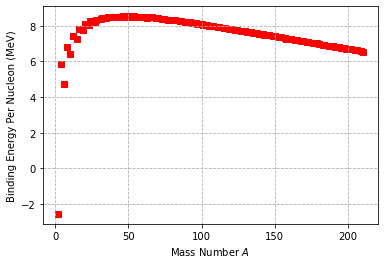

In [9]:
array1 = np.array(maxbepn_List)
array2 = np.array(mostStableA_List)

plt.scatter(array2, array1, color="red", marker=",")
plt.grid(linestyle='--')
plt.xlabel(r"Mass Number $A$")
plt.ylabel(r"Binding Energy Per Nucleon (MeV)")
plt.savefig("binding energy.png", dpi=150)

### Exercise 2.11: Binomial coefficients
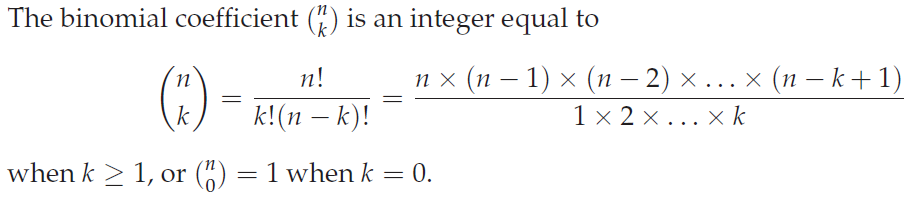

Using this form for the binomial coefficient, write a Python user-defined function ```binomial(n,k)``` that calculates the binomial coefficient for given n and k. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where k = 0.

In [10]:
def binomial(n,k):
    running_denom, running_prod = 1, 1
    for i in range(1,k+1):
        running_denom *= i 
    for j in range(n-k+1, n+1):
        running_prod *= j 
    return running_prod//running_denom

Using your function write a program to print out the first 20 lines of Pascal’s triangle. The $n$th lne of the triangle contains $n+1$ numbers, which are the coefficient $\binom{n}{0}$, $\binom{n}{1}$, and so on up to $\binom{n}{n}$.

In [11]:
for n in range(1,21):
    myList=[]
    for k in range(0,n+1):
        myList.append(binomial(n,k))
    print(*myList)

1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


The probability that an unbiased coin, tossed $n$ times, will come up heads $k$ times is $\frac{\binom{n}{k}}{2^n}$. Write a program to calculate (a) the total probability that a coin tossed 100 times comes up heads exactly 60 times, and (b) the probability that it comes up heads 60 or more times.

In [12]:
def probability(n,k):
    unbiased_prob = binomial(n,k)/(2**n)
    return unbiased_prob

In [13]:
print("(a) The probability that a coin tossed 100 times comes up heads exactly 60 times is {:.3f}".format(probability(100,60)))

(a) The probability that a coin tossed 100 times comes up heads exactly 60 times is 0.011


In [14]:
print("(b) The probability, however, that it comes up heads 60 or more times is {:.3f}".format(1-probability(100,60)))

(b) The probability, however, that it comes up heads 60 or more times is 0.989


**Plot of the Probability Distribution**

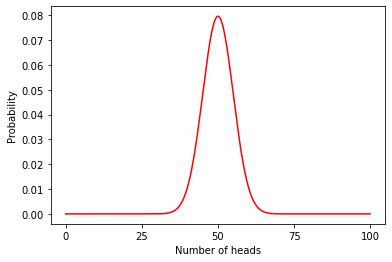

In [15]:
x = np.linspace(0,100,1000)
y = comb(100,x)*0.5**(x)*0.5**(100-x) # from the binomial distribution formula

plt.plot(x, y, color="red")
plt.xticks([0,25,50,75,100])
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.savefig("prob distribution.png", dpi=150)